# **Galactic R-velations: Classifying Celestial Objects with K-Nearest Neighbors**

# **Table of Contents**

### Introduction

> What is Stellar Classification?
> 
> Classifying Celestial Objects & Our Question
> 
> Dataset
> 
> Literature Review

### Methods & Results

> 1. Load Data
> 
> 2. Clean & Wrangle Data
> 
> 3. Exploratory Data Analysis
> 
> 4. Visualize Relationships
> 
> 5. Data Analysis

### Results

### Discussion

> Summary
> 
> Expected Findings
> 
> Impacts
> 
> Future Questions

### References

# **Introduction**

### What is Stellar Classification?

Our project leverages the Sloan Digital Sky Survey's seventeenth release (SDSS17), which includes a Stellar Classification Dataset with over 100,000 celestial observations, to distinguish between stars, galaxies, and quasars based on their spectral properties. Each type of celestial body has a distinct spectral signature: stars shine with a steady light, galaxies emit light from vast star collections, and quasars emit intense energy from supermassive black holes. By accurately classifying these entities, we gain a better understanding of the universe's structure and evolutionary processes.

### Classifying Celestial Objects & Our Question

**Question:** Can we predict whether a stellar object is a star, a galaxy, or a quasar based on their photometric ratios and redshifts?

### Dataset

Our data set comes from Kaggle and explores the classification of celestial objects into stars, galaxies, and quasars.
The variables for this dataset include observed characteristics of the object's electromagnetic radiation, its unique identifier, and identification labels of each observation.

### Determining Features through Literature Review

Research has proven **color indices** and **photometric redshifts** to be good metrics for celestial object classification (Wolf et al., 2017). Color indices (u-g, g-r, r-i, and i-z) are the differences between the magnitudes of the object in two different filters, representing the object's color. These factors help to reveal the physical properties of celestial objects (Elting et al., 2018). The redshift value is based on increases in radiation wavelength and points to an object's lifetime and motion.

# **Methodology**

1. Load Data
2. Clean & Wrangle Data
3. Exploratory Data Analysis
4. Visualize Exploratory Data
5. Data Analysis
> 5.1 Downsample uneven data
>
> 5.2 Standardize parameters
> 
> 5.3 Choosing the best k
> 
> 5.4 Fitting classifier with best k
>
> 5.5 Making predictions on testing data
6. Evaluating Results

#### **Preliminary exploratory data analysis** 

We first install and load the necessary packages for explanatory analysis.

In [4]:
# Run this cell if neccessary
install.packages('kknn')
install.packages("themis")
install.packages('cowplot')
install.packages('ggpubr')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’


Warning message in install.packages("ggpubr"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘ggpubr’ had non-zero exit status”
Updating HTML index of packages in 

In [5]:
# Run this cell to download all necessary packages before continuing
library(rvest)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(dplyr)
library(ggplot2)
#library(kknn)
library(themis)
library(shiny)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8   

## **1) Load Data**

We read in our dataset from the URL generated through GitHub:

In [6]:
# Read in data
URL <- 'https://raw.githubusercontent.com/jasukej/dsci-100-2024w2-group-19/main/data/star_classification.csv'
celestial_data <- read_csv(URL)

# Display all columns
glimpse(celestial_data)

Rows: 100000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): class
dbl (17): obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, fi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 100,000
Columns: 18
$ obj_ID      <dbl> 1.237661e+18, 1.237665e+18, 1.237661e+18, 1.237663e+18, 1.…
$ alpha       <dbl> 135.689107, 144.826101, 142.188790, 338.741038, 345.282593…
$ delta       <dbl> 32.4946318, 31.2741849, 35.5824442, -0.4028276, 21.1838656…
$ u           <dbl> 23.87882, 24.77759, 25.26307, 22.13682, 19.43718, 23.48827…
$ g           <dbl> 22.27530, 22.83188, 22.66389, 23.77656, 17.58028, 23.33776…
$ r           <dbl> 20.39501, 22.58444, 20.60976, 21.61162, 16.49747, 21.32195…
$ i           <dbl> 19.16573, 21.16812, 19.34857, 20.50454, 15.97711, 20.25615…
$ z           <dbl> 18.79371, 21.61427, 18.94827, 19.25010, 15.54461, 19.54544…
$ run_ID      <dbl> 3606, 4518, 3606, 4192, 8102, 8102, 7773, 7773, 3716, 5934…
$ rerun_ID    <dbl> 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301…
$ cam_col     <dbl> 2, 5, 2, 3, 3, 3, 2, 2, 5, 4, 3, 4, 2, 2, 3, 4, 5, 5, 5, 5…
$ field_ID    <dbl> 79, 119, 120, 214, 137, 110, 462, 346, 108, 122, 27, 112, …
$ spec_obj_ID 

The total set of variables in this data set are:

1. **obj_ID**: Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. **alpha**: Right Ascension angle (at J2000 epoch)
3. **delta**: Declination angle (at J2000 epoch)
4. **u**: Ultraviolet filter in the photometric system
5. **g**: Green filter in the photometric system
6. **r**: Red filter in the photometric system
7. **i**: Near Infrared filter in the photometric system
8. **z**: Infrared filter in the photometric system
9. **run_ID**: Run Number used to identify the specific scan
10. **rereun_ID**: Rerun Number to specify how the image was processed
11. **cam_col**: Camera column to identify the scanline within the run
12. **field_ID**: Field number to identify each field
13. **spec_obj_ID**: Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. **class**: object class (galaxy, star or quasar object)
15. **redshift**: redshift value based on the increase in wavelength
16. **plate**: plate ID, identifies each plate in SDSS
17. **MJD**: Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. **fiber_ID**: fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

## **2) Clean & Wrangle Data**

The dataset is already tidy and contains no null values. 
* We remove all duplicate observations with the same `spec_obj_ID`, as they refer to the same celestial object. 
* Based on the literature review, we will mutate the data to **display color indices in order of the electromagnetic radiation spectrum**.
* To fit the data with our analysis, we establish the `class` as a categorical variable, and select only the relevant variables to our classification problem.

Our clean and wrangled data will be assigned to a new tibble called `tidy_celestial`.

In [7]:
tidy_celestial <- celestial_data |>

# Keep only distinct observations with the same spectral object IDs
    distinct(spec_obj_ID, .keep_all = TRUE) |>

# Establish class as a categorical variable
    mutate(class = as_factor(class)) |>

# Create new columns for the ratio of color indices
    mutate(u_g = u - g,     # Ultraviolet - Green
           g_r = g - r,     # Green - Red
           r_i = r - i,     # Red - Near Infrared
           i_z = i - z)  |> # Near Infrared - Infrared 

# Filter missing values
    filter(!is.na(u_g + g_r + r_i + i_z + redshift)) |>

# Select only relevant features
    select(class, u_g, g_r, r_i, i_z, redshift) 

# Set table title
title <- "Table 1: Tidy Celestial Object Dataset"
cat("\n", title, "\n")
                    
head(tidy_celestial)


 Table 1: Tidy Celestial Object Dataset 


class  u_g      g_r     r_i     i_z      redshift 
1 GALAXY  1.60352 1.88029 1.22928  0.37202 0.6347936
2 GALAXY  1.94571 0.24744 1.41632 -0.44615 0.7791360
3 GALAXY  2.59918 2.05413 1.26119  0.40030 0.6441945
4 GALAXY -1.63974 2.16494 1.10708  1.25444 0.9323456
5 GALAXY  1.85690 1.08281 0.52036  0.43250 0.1161227
6 QSO     0.15051 2.01581 1.06580  0.71071 1.4246590

## **3) Exploratory Data Analysis**

#### **3.1) Split training and testing data (75% training, 25% testing)**

First we split the `tidy_celestial` dataset into training `celestial_train` and `celestial_test` sets to ensure the classifier is unbiased towards data outside the training set (in this case, our testing data). We have chosen to use a 75/25 split; 75% of our data will be in the training set and 25% will be in the testing set. A larger proportion of training data has been found to be beneficial for the accuracy of the classifier.

We do not check for missing values as we have previously filtered them out.

In [8]:
set.seed(2024)

celestial_split <- initial_split(tidy_celestial, prop = 0.75, strata = class)
celestial_train <- training(celestial_split)
celestial_test <- testing(celestial_split)

# checking datasets
glimpse(celestial_train)
glimpse(celestial_test)

Rows: 74,998
Columns: 6
$ class    <fct> GALAXY, GALAXY, GALAXY, GALAXY, GALAXY, GALAXY, GALAXY, GALAX…
$ u_g      <dbl> 1.60352, 1.94571, 2.59918, -1.63974, 0.22807, 2.04617, 3.2512…
$ g_r      <dbl> 1.88029, 0.24744, 2.05413, 2.16494, 1.68046, 1.74637, 1.88158…
$ r_i      <dbl> 1.22928, 1.41632, 1.26119, 1.10708, 0.85332, 1.14542, 0.85813…
$ i_z      <dbl> 0.37202, -0.44615, 0.40030, 1.25444, 0.63795, 0.50638, 0.7230…
$ redshift <dbl> 0.63479360, 0.77913600, 0.64419450, 0.93234560, 0.47700900, 0…
Rows: 25,002
Columns: 6
$ class    <fct> GALAXY, QSO, STAR, GALAXY, STAR, GALAXY, QSO, QSO, QSO, QSO, …
$ u_g      <dbl> 1.85690, 0.15051, 3.02778, 2.75369, 3.10623, 1.80485, 0.20897…
$ g_r      <dbl> 1.08281, 2.01581, 0.72548, 1.68583, 0.48952, 1.06127, 0.26332…
$ r_i      <dbl> 0.52036, 1.06580, 0.19914, 0.95557, 0.15955, 0.49744, -0.0949…
$ i_z      <dbl> 0.43250, 0.71071, 0.32675, 0.51701, 0.30918, 0.38585, 0.20396…
$ redshift <dbl> 1.161227e-01, 1.424659e+00, 7.182029e-05, 4.849288e-01,

#### **3.2) Proportions of categorical data**

We verify that the `class` column in our data contains a roughly equal number of positive and negative responses in order to guarantee a reliable and unbiased classifier. To accomplish this, we count each category in the `class` column and use a bar graph to visualize the proportions.

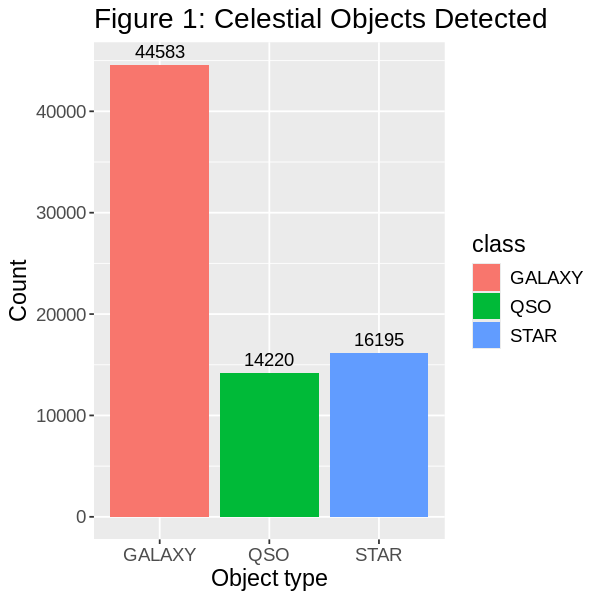

In [9]:
options(repr.plot.height = 5, repr.plot.width = 5)

# Displaying about of each category
training_count <- celestial_train |> group_by(class) |> summarize(count = n())

# Visualizing proportions of each celestial class
training_count_plot <- training_count |> 
                        ggplot(aes(x = class, y = count, fill = class)) + 
                        geom_bar(stat = "identity") + 
                        geom_text(aes(label = count), vjust = -0.5, position = position_dodge(width = 0.9)) +
                        labs(x = "Object type", y = "Count") +
                        ggtitle("Figure 1: Celestial Objects Detected") + 
                        theme(text = element_text(size = 14))
training_count_plot

We will remove one abnormality in our distribution.

In [10]:
# Identify abnormalities in distribution
celestial_train |> filter(i_z > 10000)

class u_g g_r       r_i     i_z      redshift    
1 STAR  0   -10017.17 0.14885 10017.02 8.934163e-05

In [11]:
# Filter out abnormality
celestial_train <- celestial_train |> filter(i_z < 10000)

#### **3.3) Parameter distributions**

Next, we compute the summary statistics of the parameters `u_g`, `g_r`, `r_i`, `i_z`, and `redshift` to check if we will need to standardize our data.

In [12]:
# Table for Maximum Values
max_table <- celestial_train |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ max(., na.rm = TRUE), 
                   .names = "max_{.col}"))

# Set table title
title <- "Table 3: Maximum values for training data"
cat("\n", title, "\n")

# Table for Minimum Values
min_table <- celestial_train |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ min(., na.rm = TRUE), 
                   .names = "min_{.col}"))

# Set table title
title <- "Table 4: Minimum values for training data"
cat("\n", title, "\n")

# Table for Mean Values
mean_table <- celestial_train |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ mean(., na.rm = TRUE), 
                   .names = "mean_{.col}"))

# Set table title
title <- "Table 5: Means for training data"
cat("\n", title, "\n")

max_table
min_table
mean_table


 Table 3: Maximum values for training data 

 Table 4: Minimum values for training data 

 Table 5: Means for training data 


class  max_u_g  max_g_r  max_r_i  max_i_z  max_redshift
1 GALAXY  9.71503 14.31517 10.73043  8.27322 1.995524000 
2 QSO    18.62495 11.59172  5.98677 12.54655 7.011245000 
3 STAR   11.24137 10.38554  9.87080 13.42710 0.004153254

class  min_u_g   min_g_r   min_r_i   min_i_z  min_redshift 
1 GALAXY -12.74814 -12.31861 -12.37881 -8.27794 -0.0099706670
2 QSO     -5.96729  -4.61545 -14.64907 -4.01165  0.0004606231
3 STAR    -6.51239  -9.56729  -7.68356 -9.88579 -0.0041360780

class  mean_u_g mean_g_r  mean_r_i  mean_i_z  mean_redshift
1 GALAXY 1.681461 1.3156030 0.7346991 0.4016973  0.4202291277
2 QSO    0.623829 0.3034211 0.1919830 0.1661984  1.7226604770
3 STAR   1.542298 0.6727182 0.4025195 0.2095374 -0.0001128031

### **Summary of Exploratory Data Analysis**

* From the bar plot displaying counts of celestial objects, we see that our training data is **uneven** and must be **upsampled** when training our algorithm.

* The summary statistics show distinct differences between the mean predictor values between classes. The max and min values verify that there are no longer any problematic outliers in the data. 

## **4) Visualizing relationships**

We will now visualize our results using a **box plot** displaying the correlation between the predictors and the response variable `class`.

In [13]:
# Pivot to display predictors beside the class
predictor_distribution <- pivot_longer(celestial_train, -class, names_to = "predictor", values_to = "value")

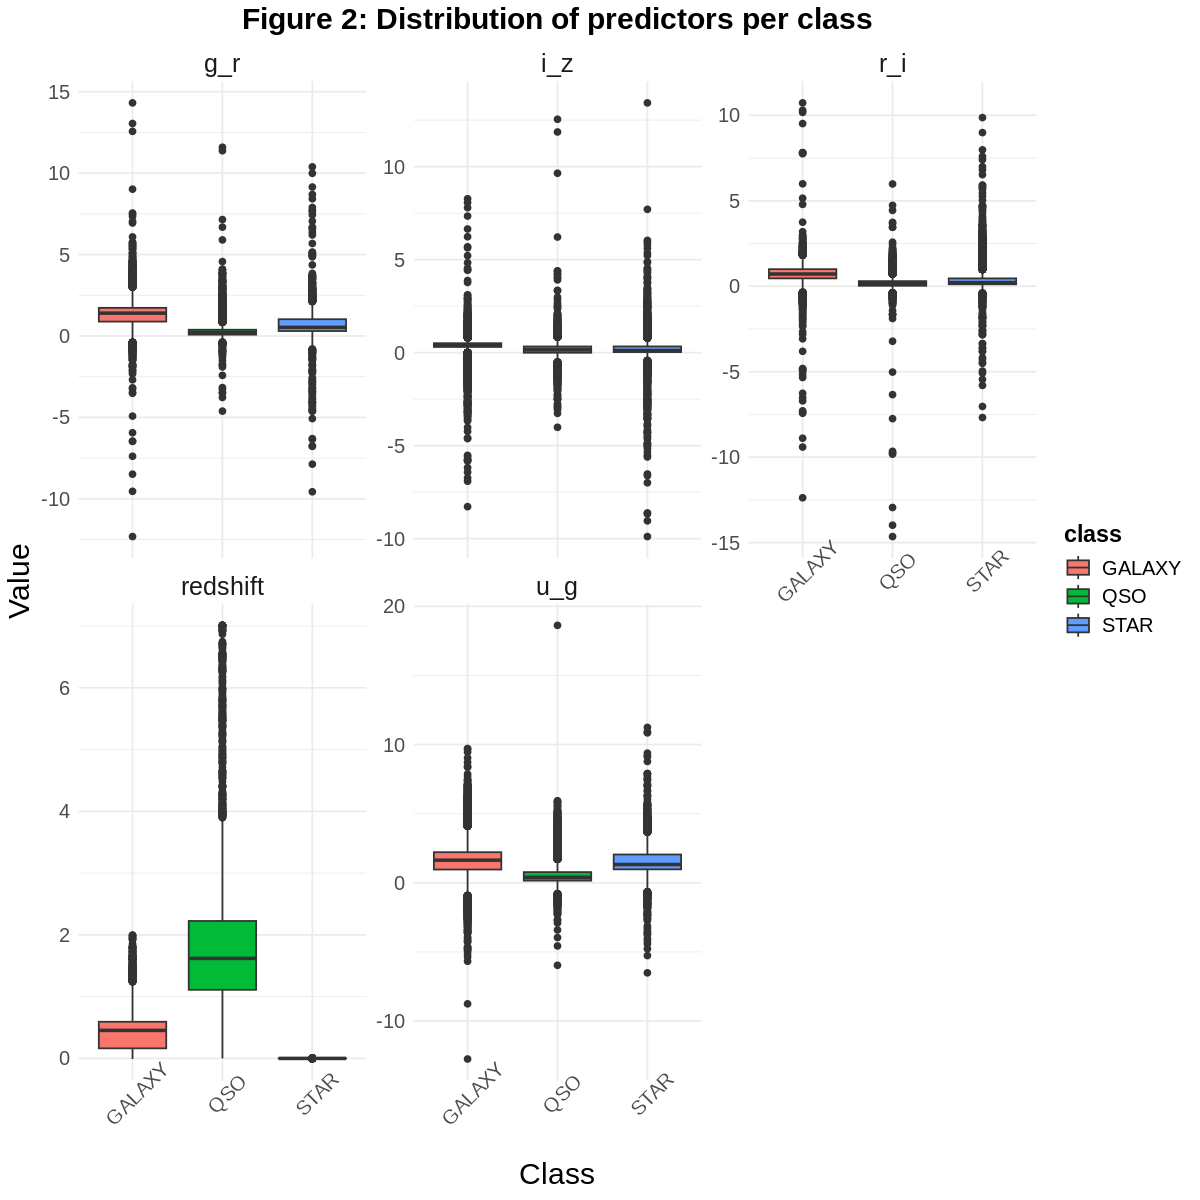

In [14]:
# Run this cell
options(repr.plot.width = 10, repr.plot.height = 10)

# Plotting each distribution
training_boxplots <- ggplot(predictor_distribution, aes(x = class, y = value, fill = class)) + 
                        geom_boxplot() +  
                        facet_wrap(~ predictor, scales = "free_y") +  # Each predictor is its own plot
                        labs(y = "Value", x = "Class") + 
                        ggtitle("Figure 2: Distribution of predictors per class") +
                        theme_minimal() +
                        theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
                              axis.title = element_text(size = 18),
                              axis.text = element_text(size = 12), 
                              axis.text.x = element_text(angle = 45, size = 12),
                              strip.text = element_text(size = 15),
                              legend.title = element_text(size = 14, face = "bold"),
                              legend.text = element_text(size = 12))
training_boxplots

Looking at the box plots, despite some overlap in the color indices, the distribution of predictor values for each class is **distinct** when compounded with the redshift values. 

## **5) Data Analysis**

As we have already split the training and testing datasets, we will first upsample the uneven data, then standardize our parameters, and create our K-nearest neighbour classifier with `celestial_train`. The following is a workflow of our methods:

**5.1) Downsample uneven data**

> a) Visualizing data before downsampling
>
> b) Downsample the data
>
> c) Visualizing data after downsampling

**5.2) Standardize parameters**

**5.3) Choosing a k**

> a) Create 5 splits
>
> b) Create and tune k-classification spec
> 
> c) Compute mean accuracies of k = [1,10] to avoid overfitting and underfitting

**5.4) Fitting classifier with determined best k**

**5.5) Testing classifier on testing data**

#### **5.1) Downsampling uneven data**
> a) Pre-downsampling visualization
>
> b) Downsample the data
>
> c) Post-downsampling visualization

#### **a) Pre-upsampling visualization**

We visualize the data before downsampling; the plot for the raw training data will be named `not_ups_plot`.

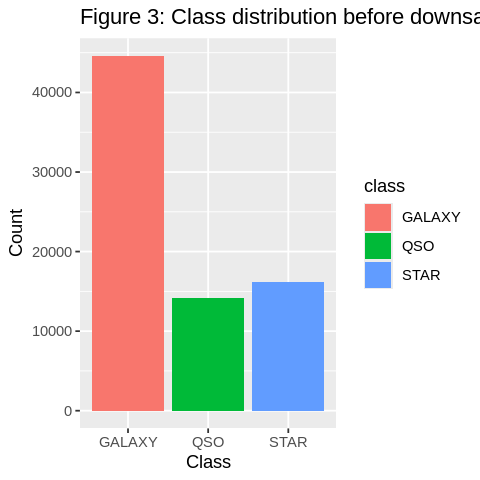

In [15]:
options(repr.plot.height = 4, repr.plot.width = 4)

# Assign training data
not_downs_celestial <- celestial_train

# Plotting the pre-downsample training data to display uneven distribution
not_downs_plot <- not_downs_celestial|>
                ggplot(aes(x = class)) + geom_bar(aes(fill = class)) +
                ggtitle("Figure 3: Class distribution before downsampling") + 
                labs(x = "Class", y = "Count")

not_downs_plot

Training on uneven distribution of classes in our data, especially when the proportion of 'quasar' and 'star' classes are extremely low, will likely cause the KNN model to indiscernibly predict a large majority of our test data as the majority 'galaxy' class. As such, we utilise downsampling to maximize the accuracy of our KNN model.

#### **b) Downsampling data**

We downsample the data in this step, and display the count of each class in `downs_count`.

In [16]:
set.seed(2024)

# Creating recipe for downsampling
downs_recipe <- recipe(class ~ u_g + g_r + r_i + i_z + redshift, data = celestial_train) |>
                step_downsample(class, under_ratio = 1, skip = FALSE) |>
                prep()

# Applying this to our training data
celestial_train_downs <- bake(downs_recipe, celestial_train)

# Check that our data is downsampled
downs_count <- celestial_train_downs |> 
                group_by(class) |>
                summarize(count = n())

# Set table title
title <- "Table 6: Proportions of Celestial Class after Downsampling"
cat("\n", title, "\n")

# Print table
downs_count


 Table 6: Proportions of Celestial Class after Downsampling 


class  count
1 GALAXY 14220
2 QSO    14220
3 STAR   14220

#### **c) Post-downsampling visualization**

We visualize the data after downsampling. The plot for the downsampled training data will be named `downsampled_plot`.

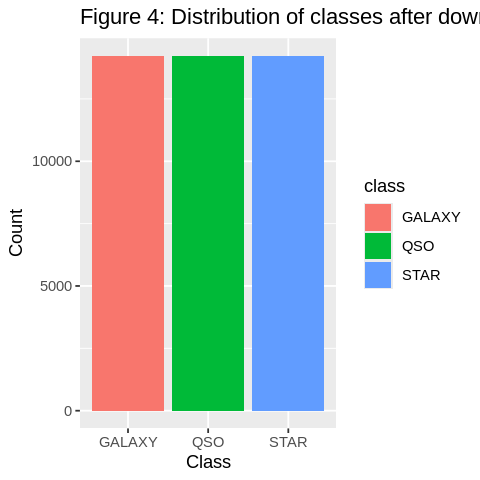

In [18]:
options(repr.plot.height = 4, repr.plot.width = 4)

#Assign training data
downsampled_celestial <- celestial_train_downs

downsampled_plot <- downsampled_celestial|>
                ggplot(aes(x = class)) + geom_bar(aes(fill = class)) +
                ggtitle("Figure 4: Distribution of classes after downsampling") + 
                labs(x = "Class", y = "Count")

downsampled_plot

From our visualization, we see that upsampling our data balances it, hence allowing for a more representative model to predict the classification of each observation. This improves the recall of our model.

### **5.2) Standardize Parameters**

From our exploratory data analysis, we found that the standard deviations of the predictors differed by a considerable amount. As the KNN classification algorithm is sensitive to differences in scale between predictors, we will standardize the predictors through centering and then scaling the data. 

We will only apply standardization to the training set for now to ensure that the testing data does not influence our model whatsover. We will apply standardization separately before predicting the results of our testing data.

In [19]:
# Mean and standard deviation before standardization

max_table
# Set table title
title <- "Table 3: Maximum values for training data"
cat("\n", title, "\n")

min_table
# Set table title
title <- "Table 4: Minimum values for training data"
cat("\n", title, "\n")

mean_table
# Set table title
title <- "Table 5: Mean values for training data"
cat("\n", title, "\n")

class  max_u_g  max_g_r  max_r_i  max_i_z  max_redshift
1 GALAXY  9.71503 14.31517 10.73043  8.27322 1.995524000 
2 QSO    18.62495 11.59172  5.98677 12.54655 7.011245000 
3 STAR   11.24137 10.38554  9.87080 13.42710 0.004153254


 Table 3: Maximum values for training data 


class  min_u_g   min_g_r   min_r_i   min_i_z  min_redshift 
1 GALAXY -12.74814 -12.31861 -12.37881 -8.27794 -0.0099706670
2 QSO     -5.96729  -4.61545 -14.64907 -4.01165  0.0004606231
3 STAR    -6.51239  -9.56729  -7.68356 -9.88579 -0.0041360780


 Table 4: Minimum values for training data 


class  mean_u_g mean_g_r  mean_r_i  mean_i_z  mean_redshift
1 GALAXY 1.681461 1.3156030 0.7346991 0.4016973  0.4202291277
2 QSO    0.623829 0.3034211 0.1919830 0.1661984  1.7226604770
3 STAR   1.542298 0.6727182 0.4025195 0.2095374 -0.0001128031


 Table 5: Mean values for training data 


In [20]:
# Standardizing the data 
celestial_recipe <- recipe(class ~ u_g + g_r + r_i + i_z + redshift, data = celestial_train_downs) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors()) |>
                    prep()

scaled_train <- bake(celestial_recipe, celestial_train_downs)

In [21]:
# Mean and standard deviation after standardization
# Table for Maximum Values
max_table <- scaled_train |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ max(., na.rm = TRUE), 
                   .names = "max_{.col}"))
title <- "Table 7: Maximum values for training data"
cat("\n", title, "\n")

# Table for Minimum Values
min_table <- scaled_train |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ min(., na.rm = TRUE), 
                   .names = "min_{.col}"))
title <- "Table 8: Minimum values for training data"
cat("\n", title, "\n")

# Table for Mean Values
mean_table <- scaled_train |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ mean(., na.rm = TRUE), 
                   .names = "mean_{.col}"))
title <- "Table 8: Mean values for training data"
cat("\n", title, "\n")

max_table
min_table
mean_table


 Table 7: Maximum values for training data 

 Table 8: Minimum values for training data 

 Table 8: Mean values for training data 


class  max_u_g   max_g_r  max_r_i  max_i_z  max_redshift
1 GALAXY  6.602539 18.62523 19.29742 16.67984  1.3859561  
2 QSO    15.414178 14.88113 10.39828 27.20246  6.8748298  
3 STAR    8.850133 13.22292 17.68475 29.15201 -0.7761245

class  min_u_g    min_g_r   min_r_i   min_i_z    min_redshift
1 GALAXY -12.476682 -14.16788 -24.05570 -14.803475 -0.7915463  
2 QSO     -6.448467  -7.39985 -28.31473  -9.457744 -0.7801565  
3 STAR    -6.933064 -14.20745 -15.24737 -20.591103 -0.7851755

class  mean_u_g   mean_g_r   mean_r_i    mean_i_z   mean_redshift
1 GALAXY  0.3572154  0.7613691  0.54831412  0.3157198 -0.3195098   
2 QSO    -0.5889233 -0.6375786 -0.47278948 -0.2078999  1.1002917   
3 STAR    0.2317079 -0.1237906 -0.07552464 -0.1078199 -0.7807819

### **5.3) Choosing a k**

To maximize the accuracy of our classifier, we will create 5 different splits of our training data and predict the mean accuracy across the splits for k = [1, 10]. We will then plot a line plot displaying the accuracy using the respective k neighbours.

#### **a) Creating 5 splits**

Here we create 5 samples to compute our samples:

In [22]:
set.seed(2024)
celestial_vfold <- vfold_cv(scaled_train, v = 5, strata = class)

#### **b) Creating specification for knn classfication**

In [23]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### **c) Computing mean accuracies of k = [1,10]**

We choose to look at values of k from 1 to 10. This range of k is chosen because it covers the lowest possible value of k: 1, while covering a safe range of values for computational efficiency. However, if we find that the difference between different k values in this range is negligible, we will try a greater range of k values. 

In [30]:
# Compile recipe and specification into a workflow
celestial_workflow <- workflow() |>
                        add_recipe(celestial_recipe) |>
                        add_model(knn_spec) |>
                        tune_grid(resamples = celestial_vfold, grid = tibble(neighbors = 1:10))

In [31]:
# Collecting metrics
metrics <- collect_metrics(celestial_workflow) |>
            filter(.metric == "accuracy") 

title <- "Table 9: Mean accuracies for k in [1, 10]"
cat("\n", title, "\n")

metrics


 Table 9: Mean accuracies for k in [1, 10] 


neighbors .metric  .estimator mean      n std_err      .config              
1   1        accuracy multiclass 0.9396624 5 0.0007995808 Preprocessor1_Model01
2   2        accuracy multiclass 0.9396624 5 0.0007995808 Preprocessor1_Model02
3   3        accuracy multiclass 0.9491561 5 0.0009466864 Preprocessor1_Model03
4   4        accuracy multiclass 0.9494609 5 0.0008216119 Preprocessor1_Model04
5   5        accuracy multiclass 0.9504219 5 0.0009875937 Preprocessor1_Model05
6   6        accuracy multiclass 0.9499766 5 0.0010896989 Preprocessor1_Model06
7   7        accuracy multiclass 0.9504454 5 0.0008875197 Preprocessor1_Model07
8   8        accuracy multiclass 0.9504688 5 0.0009277786 Preprocessor1_Model08
9   9        accuracy multiclass 0.9500703 5 0.0010244619 Preprocessor1_Model09
10 10        accuracy multiclass 0.9500234 5 0.0009873155 Preprocessor1_Model10

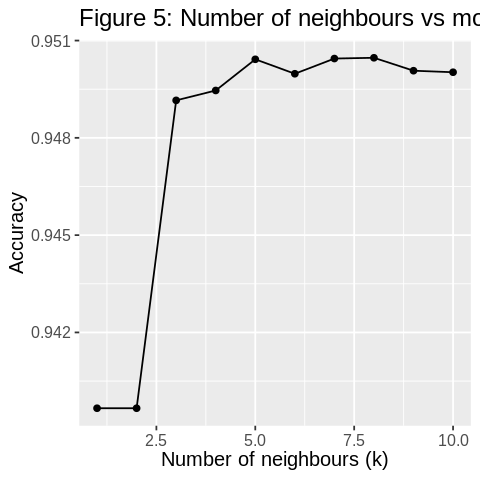

In [32]:
# Visualizing the best k
best_k_plot <- metrics |> ggplot(aes(x = neighbors, y = mean)) +
                geom_line() +
                geom_point() +
                labs(x = "Number of neighbours (k)", y = "Accuracy") +
                ggtitle("Figure 5: Number of neighbours vs model accuracy") +
                theme(text = element_text(size = 12))
best_k_plot

From the elbow method, we have determined that our model's accuracy is highest at 5, and beyond that, increasing the number of 'k's would be detrimental to our model. k=5 is chosen over k=3, or k=4, because we notice a considerable increase in accuracy between k=4 and k=5.  

### **5.4) Fit classifier with best k found**

In [33]:
# Creating knn model with best k: 5
best_k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
                set_engine("kknn") |>
                set_mode("classification")

# Fitting improved model on training data
best_k_fit <- workflow() |>
                add_recipe(celestial_recipe) |>
                add_model(best_k_spec) |>
                fit(data = celestial_train)
best_k_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04349507
Best kernel: rectangular
Best k: 5

### **5.5) Make predictions on testing data**

In [34]:
# Predicting test set with a k = 5 classifier
celestial_predictions <- predict(best_k_fit, celestial_test) |>
                            bind_cols(celestial_test)

In [36]:
# Set table title
title <- "Table 10: KNN prediction results with k=5 classifier"
cat("\n", title, "\n")

# Print (preview of) the table
head(celestial_predictions)


 Table 10: KNN prediction results with k=5 classifier 


.pred_class class  u_g     g_r     r_i     i_z     redshift     
1 GALAXY      GALAXY 1.85690 1.08281 0.52036 0.43250  1.161227e-01
2 QSO         QSO    0.15051 2.01581 1.06580 0.71071  1.424659e+00
3 STAR        STAR   3.02778 0.72548 0.19914 0.32675  7.182029e-05
4 GALAXY      GALAXY 2.75369 1.68583 0.95557 0.51701  4.849288e-01
5 STAR        STAR   3.10623 0.48952 0.15955 0.30918 -4.285760e-04
6 GALAXY      GALAXY 1.80485 1.06127 0.49744 0.38585  1.115879e-01

## **6) Evaluating results**

#### **a) Viewing metrics**

Below, we evaluate the results of our KNN model with k=5 neighbours to see how well it performs on testing data. We display the accuracy and confusion matrix as follows.

In [39]:
# Evaluating result accuracy
celestial_metrics <- celestial_predictions |>
                        metrics(truth = class, estimate = .pred_class) |>
                        filter(.metric == "accuracy")

# Set table title
title <- "Table 11: Evaluating accuracy for k=5 classifier on testing data"
cat("\n", title, "\n")

# Print the table

celestial_metrics


 Table 11: Evaluating accuracy for k=5 classifier on testing data 


.metric  .estimator .estimate
1 accuracy multiclass 0.9573234

#### **b) Visualizing the Confusion Matrix**

In [40]:
# Generate the confusion matrix
celestial_conf_mat <- celestial_predictions |> 
                        conf_mat(truth = class, estimate = .pred_class)

# Set table title
title <- "Table 12: Confusion matrix of our model on test data"
cat("\n", title, "\n")
celestial_conf_mat


 Table 12: Confusion matrix of our model on test data 


          Truth
Prediction GALAXY   QSO  STAR
    GALAXY  14329   352   157
    QSO       217  4368     4
    STAR      316    21  5238

We calculate the precision and recall for each of the classes, and average them to find the model's overall precision and recall.

In [2]:
# Confusion matrix values
TP_GALAXY <- 14329
FP_GALAXY <- 217 + 316
FN_GALAXY <- 352 + 157

TP_QSO <- 4368
FP_QSO <- 352 + 21
FN_QSO <- 217 + 4

TP_STAR <- 5238
FP_STAR <- 157 + 4
FN_STAR <- 316 + 21

# Precision calculations
precision_GALAXY <- TP_GALAXY / (TP_GALAXY + FP_GALAXY)
precision_QSO <- TP_QSO / (TP_QSO + FP_QSO)
precision_STAR <- TP_STAR / (TP_STAR + FP_STAR)

# Recall calculations
recall_GALAXY <- TP_GALAXY / (TP_GALAXY + FN_GALAXY)
recall_QSO <- TP_QSO / (TP_QSO + FN_QSO)
recall_STAR <- TP_STAR / (TP_STAR + FN_STAR)

# Print the results
cat(sprintf("Precision for GALAXY: %.2f%%\n", precision_GALAXY * 100))
cat(sprintf("Recall for GALAXY: %.2f%%\n", recall_GALAXY * 100))
cat(sprintf("Precision for QSO: %.2f%%\n", precision_QSO * 100))
cat(sprintf("Recall for QSO: %.2f%%\n", recall_QSO * 100))
cat(sprintf("Precision for STAR: %.2f%%\n", precision_STAR * 100))
cat(sprintf("Recall for STAR: %.2f%%\n", recall_STAR * 100))

Precision for GALAXY: 96.41%
Recall for GALAXY: 96.57%
Precision for QSO: 92.13%
Recall for QSO: 95.18%
Precision for STAR: 97.02%
Recall for STAR: 93.96%


In [5]:
# Calculate overall precision & recall
precision <- (precision_GALAXY + precision_QSO + precision_STAR) / 3
recall <- (recall_GALAXY + recall_QSO + recall_STAR) / 3

# Printing overall summary statistics
cat(sprintf("Precision: %.2f%%\n", precision * 100))
cat(sprintf("Recall: %.2f%%\n", recall * 100))
cat("Accuracy: 95.73%")

Precision: 95.19%
Recall: 95.24%
Accuracy: 95.73%

The resulting accuracy is 95.73%. Additional metrics such as recall and precision are addressed in the **Discussion**.

## **Discussion**

### Summary of Results

We have found, through creating a classification system based on the 5 nearest neighbours, that one can classify any celestial body with its colour indices and photometric redshifts as a galaxy, quasar, or star with an accuracy of 95%. 

After cleaning and splitting our data, then preprocessing the training data to engineer and include only relevant variables (namely the colour indices: `u_g`, `g_r`, `r_i`, `i_z` and `redshift`, we standardize and train the data based on the K-nearest neighbours classification model. We tuned our model to find accuracies for K-neighbours in the range of [1, 10]. As we have found that k=5 is a sufficiently discerning number of neighbours–beyond which the accuracy decreases–we deem this range to be appropriate and choose to retrain our model with k=5 nearest neighbours. 

When applied to the testing data, we produce metrics as follows:
* Precision: 95.19%
* Recall: 95.24%
* Accuracy: 95.7%

These results confirm the robustness of our model and its potential application in astrophysical data analysis and classification tasks. The precision and recall are very similar, indicating that the model neither overfit nor underfit the testing data.

### Expected Findings

The result of our analysis is consistent with our expectations–the variables we have chosen based on literature review: `u_g`, `g_r`, `r_i`, `i_z` and `redshift` are excellent predictors for classifying different types of celestial objects (Wolf et al., 2017). 

### Impacts

By optimizing the classification of stellar objects, the model aids the tedious task of classifying stellar objects while **minimizing the human resources** needed to do so. Similar techniques have been used extensively in astronomy to classify transit lines and stars (Hinners et al., 2018), and we expect that this model can be iteratively refined to produce a deployable model for astronomical research. 

### Future Implications

From our results and findings, several questions our project inspire include:

* Would the accuracy of our model be consistent given sourcing from a different telescope?
* How might our model predictions change if we considered more parameters?

Understanding the physical characteristics that define these celestial bodies provides us with further knowledge into how best to look at the universe for the larger ambitions of humanity. This knowledge about the "geography of space", as one could call it, could help us understand where life outside of Earth may habitate. In the long term, this could help us find life outside of the planet. 

# **References** 

fedesoriano. (2022). Stellar Classification Dataset - SDSS17. Kaggle.com. https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

Wolf, C., Meisenheimer, K., Kleinheinrich, M., Borch, A., Dye, S., Gray, M., Wisotzki, L., Bell, E., Rix, H., Cimatti, A., Hasinger, G., & Szokoly, G. (2004). A catalogue of the Chandra Deep Field South with multi-colour classification and photometric redshifts from COMBO-17. Astronomy and Astrophysics, 421, 913-936. https://doi.org/10.1051/0004-6361:20040525.

Elting, C., C. Bailer-Jones, & Smith, K. (2018). Photometric Classification of Stars, Galaxies and Quasars in the Sloan Digital Sky Survey DR6 Using Support Vector Machines. https://www.semanticscholar.org/paper/Photometric-Classification-of-Stars%2C-Galaxies-and-Elting-Bailer-Jones/7e880193b3a75c789c7352dd65743666af8e4dab

Hinners, T., Tat, K., & Thorp, R. (2018). Machine Learning Techniques for Stellar Light Curve Classification. the Astronomical Journal, 156(1), 7–7. https://doi.org/10.3847/1538-3881/aac16d